# Demo code to use Keplerian Element for orbit propagation

In [1]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

from src.utils import *
from src.propagation import *

## Propagation

In [2]:
## Parameters
mu = 3.986004414498200e14 # Central Body's gravitational constant (m^3/s^2)
Re = 6.378136460000000e6 # Central Body's equatorial radius (m)

In [3]:
## Initial Condition
r0 = np.array([[3762519.374555595,7653889.605494166,4920134.758261914]]) # Initial position (m)
v0 = np.array([[1634.5155553226564,-2724.4575287820444,6196.075069155325]]) # Initial velocity (m/s)

kepl0 = ijk2keplerian(r0,v0,mu) # Transform initial state to initial Keplerian elements

## Time interval to integrate
t = np.linspace(0, 315360.0, 315360+1) # time (s)

# Force in RSW coordinate (as a function of Keplerian elements) - To be replaced with your model
F_RSW = lambda kepl: np.array([0,0,0]) 

# Function to transform Force in RSW into time derivative of Keplerian elements
#                     d (kepl)/ dt = A(kepl,mu) * F_RSW(kepl) + b(kepl,mu)
dkepl_dt = lambda kepl, t: (RSW2kepl_A(kepl,mu) @ F_RSW(kepl) + RSW2kepl_b(kepl,mu))

sol = odeint(dkepl_dt, kepl0[0], t, rtol=1e-10)

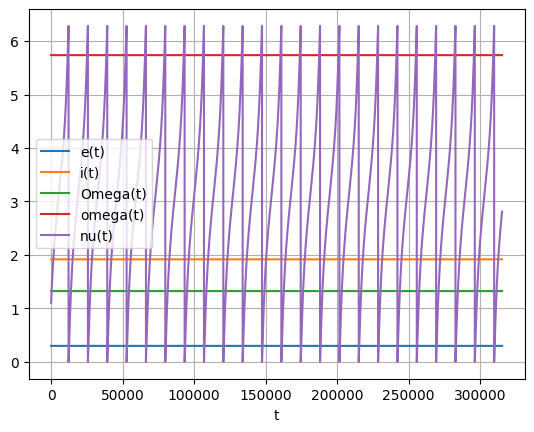

In [4]:
## Plot results
# plt.plot(t, sol[:, 0], label='a(t)')
plt.plot(t, sol[:, 1], label='e(t)')
plt.plot(t, np.mod(sol[:, 2],2*np.pi), label='i(t)')
plt.plot(t, np.mod(sol[:, 3],2*np.pi), label='Omega(t)')
plt.plot(t, np.mod(sol[:, 4],2*np.pi), label='omega(t)')
plt.plot(t, np.mod(sol[:, 5],2*np.pi), label='nu(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

##  Comparison with the data
Don't forget to validate your model!

(Hint: Have you thought about splitting the dataset into training and validation sets?)

Importing data

In [5]:
import pandas as pd
# Load the CSV file with correct column extraction
# Assuming the first column is time, next three are position (r1, r2, r3), last three are velocity (v1, v2, v3)
df = pd.read_csv('./data/Challenge1.csv', header=0, usecols=[0,1,2,3,4,5,6], names=['time','r1', 'r2', 'r3', 'v1', 'v2', 'v3'])

# Extract position and velocity arrays
# Convert time strings to pandas datetime
t_raw = pd.to_datetime(df['time'])
# Calculate seconds relative to the first time point
t_data = (t_raw - t_raw.iloc[0]).dt.total_seconds().values # Time in seconds relative to first time point
r = df[['r1', 'r2', 'r3']].values
v = df[['v1', 'v2', 'v3']].values

kepl_data = ijk2keplerian(r,v,mu)

Plotting the propagation from learnt model and the data

(0.0, 100000.0)

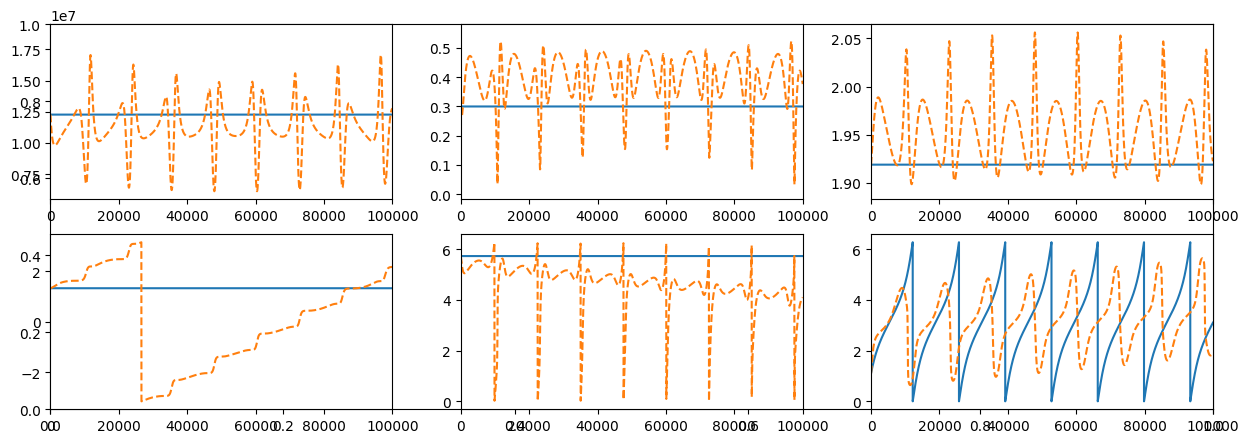

In [6]:
xmaxplt = 100000

plt.subplots(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.plot(t, sol[:, 0], label='a(t)')
plt.plot(t_data, kepl_data[:, 0], label='a_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 2)
plt.plot(t, sol[:, 1], label='e(t)')
plt.plot(t_data, kepl_data[:, 1], label='e_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 3)
plt.plot(t, np.mod(sol[:, 2],2*np.pi), label='i(t)')
plt.plot(t_data, kepl_data[:, 2], label='i_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 4)
plt.plot(t, np.mod(sol[:, 3],2*np.pi), label='Omega(t)')
plt.plot(t_data, kepl_data[:, 3], label='Omega_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 5)
plt.plot(t, np.mod(sol[:, 4],2*np.pi), label='omega(t)')
plt.plot(t_data, kepl_data[:, 4], label='omega_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

plt.subplot(2, 3, 6)
plt.plot(t, np.mod(sol[:, 5],2*np.pi), label='nu(t)')
plt.plot(t_data, kepl_data[:, 5], label='nu_data(t)', linestyle='dashed')
plt.xlim([0, xmaxplt])

# Exporting for final submission

Submit your prediction of the trajectory in the following format:
- `t` : Time - Sampled per second, projection from 2017-01-07 00:00:00 to 2017-01-11 00:00:00
- `r` : Position in x,y,z coordinate, in meter
- `v` : Velocity in x,y,z coordinate, in meter per second

Save the file in `pickle` binaries and upload.

In [7]:
t = np.linspace(0, 345600.0, 345600+1) # time (s) - projection from 2017-01-07 00:00:00 to 2017-01-11 00:00:00, sampled per second
sol = odeint(dkepl_dt, kepl_data[-1], t, rtol=1e-10)

# Convert Equinoctial elements to Cartesian coordinates
r, v = keplerian2ijk(sol, mu)

In [8]:
import pickle

with open('PredictedTrajectory.pkl', 'wb') as f:
    pickle.dump((t, r, v), f)